# Capstone Part 2: Overview

#### I will be covering neither of my proposals covered during my lightning talks. I was originally planning on doing the animal classification lab but the dataset was limited with the amount of data in there. 

#### I am planning on using cryptocurrency price predictions to determine what will be the future prices of Bitcoin, Ethereum, and Monero based on the historical open and close prices of the cryptocurrencies from kaggle.
###### https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

## Main goals of the project:

1.The main goals of the project will be to determine what the future prices of Bitcoin and Ethereum will be in one year from now or two years from now using the Kaggle dataset as well as supplementing the data with current open and close prices to provide a better prediction as to what the prices will be months from now.

## Proposed Methods and Models:

#### There about 19 sets of data included for this project from Kaggle. 3 of those are data about Bitcoin. Specifically:
#### - Bitcoin Price: 
###### - Features: Date, Open, High, Low, Close, Volume, MarketCap
#### - Bitcoin Dataset:
###### - Features: total btc in circulation, btc block size, btc hash rate, btc cost per transaction, btc # of transactions, etc 
#### - Other Crypto Currency Cash Price (Monero, Ethereum, Bitcoin, etc)
###### - Features: Same features as 'Bitcoin Price' Dataset


## Models:

###### Since I'm trying to predict the price of these cryptocurrencies, I will be using a regression model. I plan on trying out linear, Ridge, Lasso and ElasticNet to see which model would be best predict the future price. I also plan on using existing open and close price data from Bitcoin, ethereum, and Monero sites from the past few months to see if my dataset can accurately predict those prices. So I would be using dataset from Kaggle as my training dataset and using supplemental data from the web as my test data. 

## Risks and Assumptions:

### For the bitcoin_cash_price dataset there are features such Volume and Market Cap that I assume would have good predictive power on the price of bitcoin values or other cryptocurrency values but they may not have any predictive power so I may have to drop them.
### There are features in the bitcoin dataset  that need an understanding of domain knowledge so I will have to some research onto these features to understand what these mean in regards bitcoin price fluctuations and the context of it.

## Initial Goals & Success Criteria:

##### My success for this model will be determined by how accurate my predicitve model and/or it can predict the opening/closing price of currency on a past date. This is TBD, and needs to be talked more with my local instructor.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [47]:
btc_cash_price = pd.read_csv('bitcoin_cash_price.csv')
btc_price = pd.read_csv('bitcoin_price.csv')
btc_ds = pd.read_csv('bitcoin_dataset.csv')

# bitconnect_price = pd.read_csv('bitconnect_price.csv')
# dash_price = pd.read_csv('dash_price.csv')

ethereum_classic_price = pd.read_csv('ethereum_classic_price.csv')
ethereum_dataset = pd.read_csv('ethereum_dataset.csv')
ethereum_price = pd.read_csv('ethereum_price.csv')

# iota_price = pd.read_csv('iota_price.csv')
litecoin_price = pd.read_csv('litecoin_price.csv')
monero_price = pd.read_csv('monero_price.csv')
# nem_price = pd.read_csv('nem_price.csv')

# neo_price = pd.read_csv('neo_price.csv')
# numeraire_price = pd.read_csv('numeraire_price.csv')
# omisego_price = pd.read_csv('omisego_price.csv')
# qtum_price = pd.read_csv('nem_price.csv')
# ripple_price = pd.read_csv('ripple_price.csv')
# stratis_price = pd.read_csv('stratis_price.csv')
# waves_price = pd.read_csv('waves_price.csv')

## Viewing the # of rows and columns for tables across cryptocurrencies

In [48]:
print('btc_cash_price:', btc_cash_price.shape)
print('btc_price:', btc_price.shape)
print('btc_ds:', btc_ds.shape)
print('\n')
print('ethereum_classic_price:', ethereum_classic_price.shape)
print('ethereum_dataset:', ethereum_dataset.shape)
print('ethereum_price:', ethereum_price.shape)
print('\n')
print('litecoin_price:', litecoin_price.shape)
print('monero_price:', monero_price.shape)

btc_cash_price: (108, 7)
btc_price: (1655, 7)
btc_ds: (2920, 24)


ethereum_classic_price: (472, 7)
ethereum_dataset: (832, 18)
ethereum_price: (824, 7)


litecoin_price: (1655, 7)
monero_price: (1266, 7)


In [49]:
print(btc_price.shape)# we want to look at doing a timeseries on the close price
btc_price.head()

(1655, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [50]:
btc_price['Date'] = pd.to_datetime(btc_price['Date'])
# converting the date column to datetime series

btc_price = btc_price.sort_values('Date')
# reversing the order of dates from oldest to most recent

btc_price.set_index('Date',inplace = True)

In [51]:
btc_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [52]:
btc_price.isnull().sum() # no null or missing values

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [53]:
btc_price.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [54]:
btc_price['Volume'].head()

Date
2013-04-28    -
2013-04-29    -
2013-04-30    -
2013-05-01    -
2013-05-02    -
Name: Volume, dtype: object

In [55]:
btc_price['Volume'] = btc_price['Volume'].apply(lambda x: x.replace(',',''))

In [56]:
btc_price.Close.describe()

count    1655.000000
mean      826.285541
std      1119.053510
min        68.430000
25%       264.135000
50%       453.380000
75%       744.820000
max      7407.410000
Name: Close, dtype: float64

In [57]:
btc_price[btc_price['Volume'] == '-'].count()

Open          243
High          243
Low           243
Close         243
Volume        243
Market Cap    243
dtype: int64

In [58]:
corr = btc_price[['Open', 'High', 'Low', 'Close']]

In [59]:
btc_price_corr = corr.corr()

In [60]:
btc_price_corr

,Open,High,Low,Close
Open,1.000000,0.999275,0.999117,0.998519
High,0.999275,1.000000,0.998927,0.999371
Low,0.999117,0.998927,1.000000,0.999288
Close,0.998519,0.999371,0.999288,1.000000


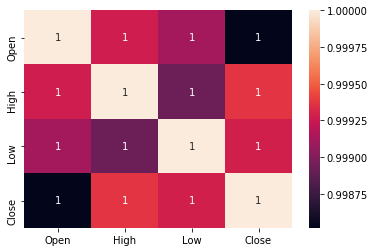

In [61]:
sns.heatmap(btc_price.corr(), annot=True)

In [64]:
btc_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


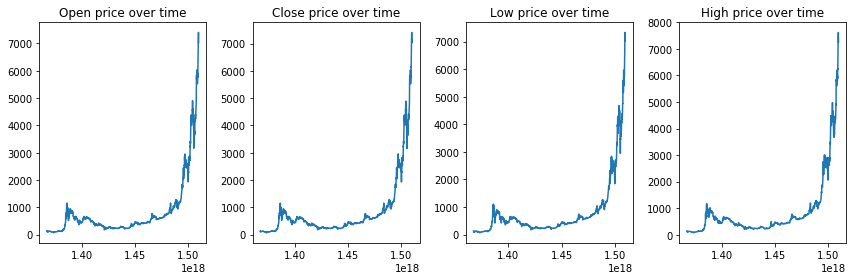

In [65]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
from statsmodels.tsa.seasonal import seasonal_decompose


ax[0].plot(btc_price.index, btc_price['Open'])
ax[0].set_title('Open price over time')

ax[1].plot(btc_price.index, btc_price['Close'])
ax[1].set_title('Close price over time')

ax[2].plot(btc_price.index, btc_price['Low'])
ax[2].set_title('Low price over time')

ax[3].plot(btc_price.index, btc_price['High'])
ax[3].set_title('High price over time')
plt.tight_layout()

In [71]:
btc_price_close = btc_price[['Close']]
btc_price_open = btc_price[['Open']]
btc_price_low = btc_price[['Low']]
btc_price_high = btc_price[['High ']]

In [73]:
btc_price_close.head()

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


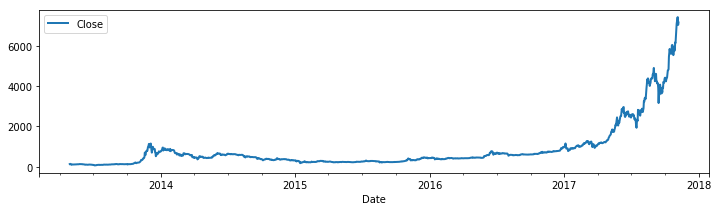

In [84]:
btc_price.plot.line(x=btc_price.index, y='Close', figsize=(12,3), lw=2)

Text(0,0.5,'Price in USD $')

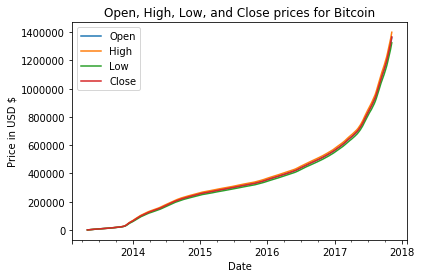

In [94]:
df_test = btc_price.cumsum()
plt.figure(); 

ax = df_test.plot(kind='line', 
                           title='Open, High, Low, and Close prices for Bitcoin');
ax.set_ylabel('Price in USD $',fontsize=10)

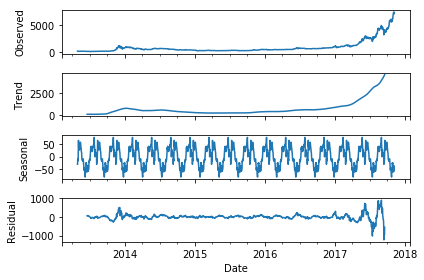

In [79]:
result = seasonal_decompose(btc_price_close, freq=100)
result.plot();